## Análisis y Modelado de Tumores utilizando Machine Learning
En este notebook, exploraremos un dataset de OpenML que contiene información sobre características de tumores y su clasificación como benignos o malignos.
El objetivo es identificar el mejor modelo de machine learning para predecir si un tumor es benigno o maligno, y afinar dicho modelo para obtener resultados óptimos.


In [1]:
import openml

dataset_id = 1510

# Descargar el dataset desde OpenML
dataset = openml.datasets.get_dataset(dataset_id)

# Extraer los datos y metadatos
X, y, _, attribute_names = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')

# Combinar los datos en un solo DataFrame
data = X.copy()
data['target'] = y

print("Dimensiones del dataset:", data.shape)
print("Primeras filas del dataset:")
print(data.head())

print("#################################")
print(data.info())

Dimensiones del dataset: (569, 31)
Primeras filas del dataset:
      V1     V2      V3      V4       V5       V6      V7       V8      V9  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

       V10  ...    V22     V23     V24     V25     V26     V27     V28  \
0  0.07871  ...  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

      V29      V30  tar

### Sobre los datos
Observamos que el dataset no tiene valores faltantes (`NaN`) y contiene información estructurada. Antes de continuar, asignaremos nombres descriptivos a las columnas para facilitar su comprensión.

In [2]:
column_names = [
    "mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness",
    "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension",
    "radius error", "texture error", "perimeter error", "area error", "smoothness error",
    "compactness error", "concavity error", "concave points error", "symmetry error", "fractal dimension error",
    "worst radius", "worst texture", "worst perimeter", "worst area", "worst smoothness",
    "worst compactness", "worst concavity", "worst concave points", "worst symmetry", "worst fractal dimension",
    "target"
]

data.columns = column_names

print(data.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

target
1    357
2    212
Name: count, dtype: int64


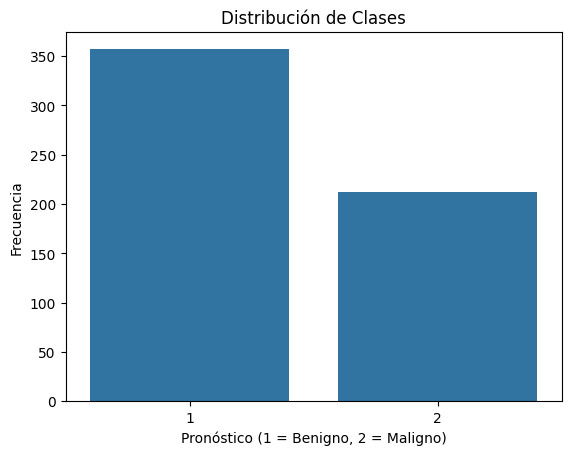

In [3]:
print(data['target'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['target'])
plt.title('Distribución de Clases')
plt.xlabel('Pronóstico (1 = Benigno, 2 = Maligno)')
plt.ylabel('Frecuencia')
plt.show()


#### Separación de Datos de Entrenamiento y Prueba
Dividimos los datos en conjuntos de entrenamiento y prueba.

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (455, 30)
Tamaño del conjunto de prueba: (114, 30)


#### Prueba de diferentes modelos
Una vez hemos separado y preparado nuestros datos, vamos a poner a prueba diferentes modelos para poder utilizar aquel que nos de un mejor resultado

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))


              precision    recall  f1-score   support

     Benigno       0.96      0.99      0.97        71
     Maligno       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg_model = LogisticRegression(max_iter=5000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("Resultados de Regresión Logística:")
print(classification_report(y_test, y_pred_logreg, target_names=['Benigno', 'Maligno']))


Resultados de Regresión Logística:
              precision    recall  f1-score   support

     Benigno       0.95      0.99      0.97        71
     Maligno       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [7]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("Resultados de Support Vector Machine (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=['Benigno', 'Maligno']))


Resultados de Support Vector Machine (SVM):
              precision    recall  f1-score   support

     Benigno       0.95      0.99      0.97        71
     Maligno       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
print("Resultados de Gradient Boosting:")
print(classification_report(y_test, y_pred_gb, target_names=['Benigno', 'Maligno']))


Resultados de Gradient Boosting:
              precision    recall  f1-score   support

     Benigno       0.96      0.97      0.97        71
     Maligno       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [9]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio con validación cruzada (Logistic Regression):", cv_scores.mean())

cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio con validación cruzada (SVM):", cv_scores.mean())

cv_scores = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio con validación cruzada (Gradient Boosting):", cv_scores.mean())


Accuracy promedio con validación cruzada (Logistic Regression): 0.9507995652848935
Accuracy promedio con validación cruzada (SVM): 0.9455364073901569
Accuracy promedio con validación cruzada (Gradient Boosting): 0.9613724576929048


#### Elección del modelo
Podemos observar después de diversas pruebas que el mejor algoritmo para nuestro caso, aunque por muy poca diferencia, es el Gradient Boosting el cual consigue muy buenos resultados a la hora de predecir si un tumor es benigno o maligno.
Ahora el objetivo es intentar refinar el modelo para que se acerque aún más a la perfección. 


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
gb_model = GradientBoostingClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],      # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],    # Tasa de aprendizaje
    'max_depth': [3, 4, 5],               # Profundidad de los árboles
    'min_samples_split': [2, 5, 10],      # Muestras mínimas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]         # Muestras mínimas en una hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,              # Validación cruzada de 5 folds
    scoring='accuracy',
    verbose=0,
    n_jobs=-1          # Usar todos los núcleos disponibles
)

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el mejor modelo
best_gb_model = grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

from sklearn.metrics import classification_report
print("Resultados del Mejor Modelo de Gradient Boosting:")
print(classification_report(y_test, y_pred_best_gb, target_names=['Benigno', 'Maligno']))


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Resultados del Mejor Modelo de Gradient Boosting:
              precision    recall  f1-score   support

     Benigno       0.96      0.97      0.97        71
     Maligno       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Los mejores hiperparámetros en nuestro caso son: 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100
